In [6]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from dataset import create_dataloader

In [7]:
def loss_function(x, x_hat, mean, var, model):
    reproduction_loss = nn.functional.mse_loss(x_hat, x, reduction='sum')
    KLD = - 0.5 * torch.sum(2*torch.log(var) - mean*mean - var*var + 1)
    l2_reg = sum(torch.sum(param**2) for param in model.parameters())
    return reproduction_loss + KLD + l2_reg*1e-6 

In [ ]:
from deep_generative_models.model import VAE, VariationalAutoEncoder


brains = ['B01', 'B02', 'B05']  # Training brains
brains = ["B20"]
hdf5_file_path = 'data/cell_data.h5'
tile_size = 128
batch_size = 4
tiles_per_epoch = 100
dataloader = create_dataloader(hdf5_file_path, brains, tile_size, batch_size, tiles_per_epoch, num_workers=0)

model = VariationalAutoEncoder(input_dim=tile_size, last_hidden_dim=128)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
epochs = 10

In [9]:
def train(model, dataloader, optimizer, loss_function, epochs, batch_size):
    epoch_losses = []
    model.train()
    for epoch in range(epochs):
        overall_loss = 0
        for i, x in enumerate(dataloader):
            optimizer.zero_grad()
            x_hat, mean, var = model(x)
            loss = loss_function(x, x_hat, mean, var, model)
            overall_loss += loss.item()
            loss.backward()
            optimizer.step()
        average_loss = overall_loss / len(dataloader)
        epoch_losses.append(average_loss)
        print(f"Epoch {epoch + 1}/{epochs}, Average Loss: {average_loss:.4f}")
    
    return epoch_losses
    
train(model, dataloader, optimizer, loss_function, epochs, batch_size)

Epoch 1/10, Average Loss: 101230.1048
Epoch 2/10, Average Loss: 118684.8920
Epoch 3/10, Average Loss: 118619.6894
Epoch 4/10, Average Loss: 80556.5605
Epoch 5/10, Average Loss: 84024.2839
Epoch 6/10, Average Loss: 70567.0514
Epoch 7/10, Average Loss: 70863.3291
Epoch 8/10, Average Loss: 70364.6619
Epoch 9/10, Average Loss: 69319.1911
Epoch 10/10, Average Loss: 67551.9230


[101230.10484375,
 118684.89203125,
 118619.689375,
 80556.56046875,
 84024.28390625,
 70567.05140625,
 70863.3290625,
 70364.661875,
 69319.19109375,
 67551.92296875]

Original batch shape: torch.Size([4, 1, 128, 128])


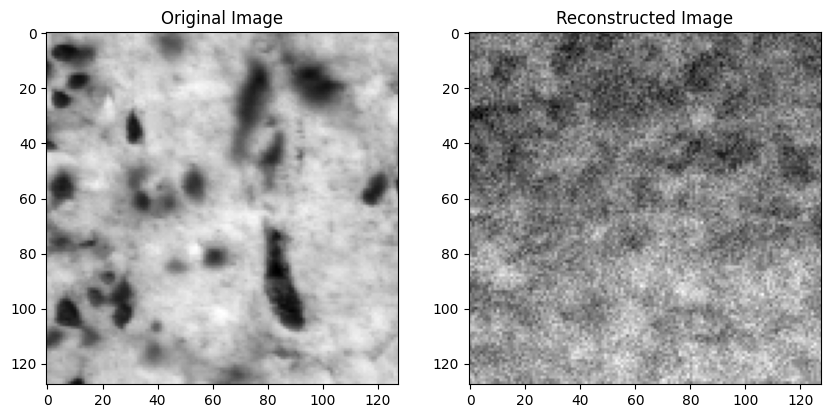

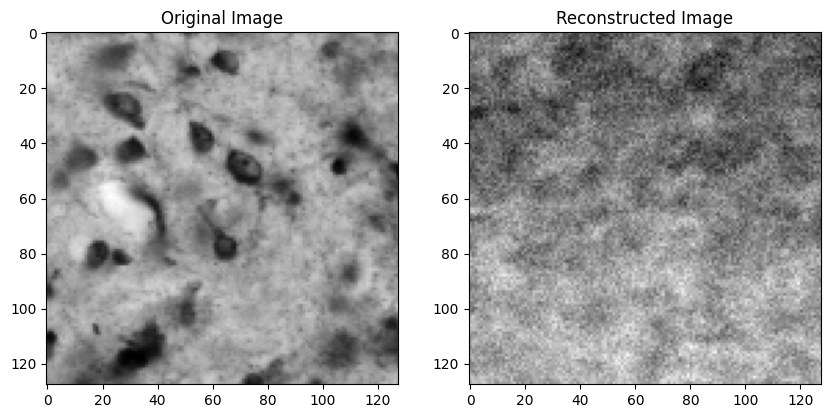

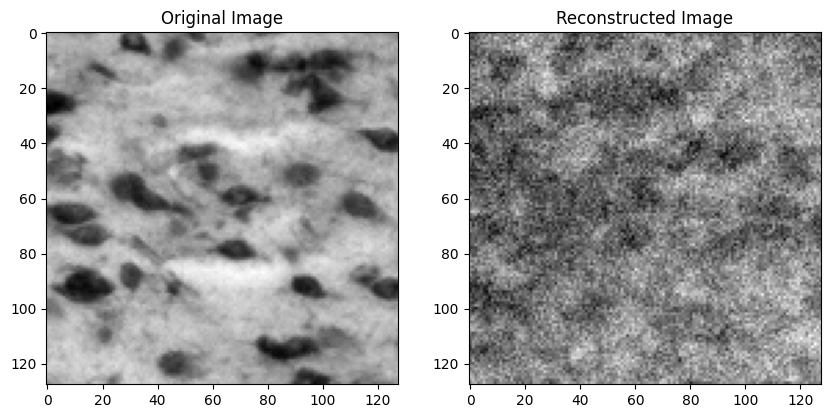

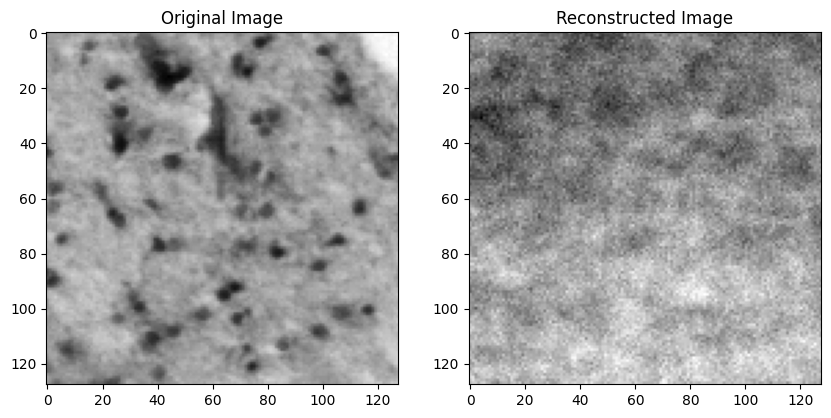

In [10]:
import matplotlib.pyplot as plt
import torch

for batch in dataloader:
    images = batch  
    print(f"Original batch shape: {images.shape}")
    x_hat, mean, var = model(images)
    reconstructed_images = x_hat.view(batch_size, 128, 128)

    for i in range(batch_size):
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        ax[0].imshow(images[i].squeeze().numpy(), cmap='gray')
        ax[0].set_title("Original Image")
        ax[1].imshow(reconstructed_images[i].detach().numpy(), cmap='gray')
        ax[1].set_title("Reconstructed Image")
        plt.show()
    
    break  
